## Imports

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
true = True
false = False

In [4]:
dTrain = pd.read_csv('datasets/train.csv')
dTest = pd.read_csv('datasets/test.csv')

In [5]:
dTrain.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [6]:
dTest.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


## Check for missing data

In [7]:
dTrain.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [8]:
dTest.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

### Check dataset description

In [9]:
dTrain.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [10]:
dTest.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


### Sample

In [11]:
dTest.sample(20)
dTrain.sample(20)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
139828,139828,Dodge,Ram 2500 SLT Quad Cab,2003,256000,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Beige,At least 1 accident or damage reported,Yes,7000
554,554,Mercedes-Benz,S-Class S 560 4MATIC,2019,10483,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,9-Speed Automatic,Black,Black,None reported,Yes,42999
36500,36500,Land,Rover Range Rover Velar R-Dynamic S,2023,10917,Gasoline,I4,Automatic,Firenze Red,Black,None reported,NaN,46998
167853,167853,Ford,Expedition Platinum,2022,24500,Gasoline,440.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,62000
39616,39616,Cadillac,XTS Luxury,2013,183000,Gasoline,304.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Gray,Gray,At least 1 accident or damage reported,Yes,11000
70226,70226,Chevrolet,Silverado 1500 LT Trail Boss,2016,64800,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,None reported,Yes,20900
93493,93493,INFINITI,QX60 Base,2018,51500,Gasoline,295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Beige,None reported,Yes,23750
63062,63062,Chevrolet,Corvette Base,2013,63900,Gasoline,400.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Silver,Gray,None reported,Yes,33000
159642,159642,Audi,Q4 e-tron Sportback Premium,2023,5844,NaN,295.0HP Electric Motor Electric Fuel System,1-Speed A/T,Blue,Black,None reported,Yes,45023
53308,53308,Dodge,Charger SRT Hellcat,2018,26000,Gasoline,370.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,48000


## Feature Engineering

### Extraction of features

#### Horse Power

In [12]:
def extractHP(model):
	if 'HP' in model.upper():
		return model.split('HP')[0]
	return None

dTest['horse_power'] = dTest['engine'].apply(extractHP)

dTrain['horse_power'] = dTrain['engine'].apply(extractHP)
dTrain

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horse_power
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,None


#### Engine Capacity

In [13]:
import re

def extractEngineCapacity(model):
	ec = re.search("\d+\.?\d*L", model)
	return ec[0][:-1] if ec != None else None

dTest['engine_capacity'] = dTest['engine'].apply(extractEngineCapacity)

dTrain['engine_capacity'] = dTrain['engine'].apply(extractEngineCapacity)
dTrain

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horse_power,engine_capacity
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0,6.2
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0,3.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0,4.0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,None,3.0


#### Car Age

In [14]:
from datetime import datetime

dTest['model_age'] = datetime.now().year - dTest['model_year']

dTrain['model_age'] = datetime.now().year - dTrain['model_year']
dTrain

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horse_power,engine_capacity,model_age
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,18
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,23
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,23
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0,6.2,8
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0,3.0,7
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0,4.0,4
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,None,3.0,3


### Get Dummies

In [15]:
test_status = pd.get_dummies(dTest['accident'], prefix='status')

train_status = pd.get_dummies(dTrain['accident'], prefix='status')
train_status

,status_At least 1 accident or damage reported,status_None reported
0,False,True
1,True,False
2,False,True
3,False,True
4,False,True
...,...,...
188528,False,True
188529,True,False
188530,False,True
188531,False,True


#### Overwriting a column

In [16]:
dTest['accident'] = test_status['status_At least 1 accident or damage reported'].apply(lambda x: True if x else False)

dTrain['accident'] = train_status['status_At least 1 accident or damage reported'].apply(lambda x: True if x else False)
dTrain

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horse_power,engine_capacity,model_age
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,False,Yes,4200,172.0,1.6,18
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,True,Yes,4999,252.0,3.9,23
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,False,Yes,13900,320.0,5.3,23
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,False,Yes,45000,420.0,5.0,8
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,False,Yes,97500,208.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,False,Yes,27500,420.0,6.2,8
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,True,Yes,30000,385.0,3.0,7
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,False,Yes,86900,469.0,4.0,4
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,False,NaN,84900,None,3.0,3


### One-Hot Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

toEncode = [
	"brand",
	"fuel_type",
	"ext_col",
	"int_col",
	"transmission",	
]

encoder = LabelEncoder()

for col in toEncode:
	dTest[f"{col}_label"] = encoder.fit_transform(dTest[col])
	dTrain[f"{col}_label"] = encoder.fit_transform(dTrain[col])

dTrain

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,...,clean_title,price,horse_power,engine_capacity,model_age,brand_label,fuel_type_label,ext_col_label,int_col_label,transmission_label
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,...,Yes,4200,172.0,1.6,18,31,2,312,71,38
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,...,Yes,4999,252.0,3.9,23,28,2,263,10,38
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,...,Yes,13900,320.0,5.3,23,9,1,38,71,38
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,...,Yes,45000,420.0,5.0,8,16,2,29,14,49
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,...,Yes,97500,208.0,2.0,4,36,2,29,10,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,...,Yes,27500,420.0,6.2,8,8,2,304,10,49
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,...,Yes,30000,385.0,3.0,7,36,2,304,14,31
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,...,Yes,86900,469.0,4.0,4,36,2,304,14,23
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,...,NaN,84900,None,3.0,3,3,2,82,14,1


### Correlation Heatmap

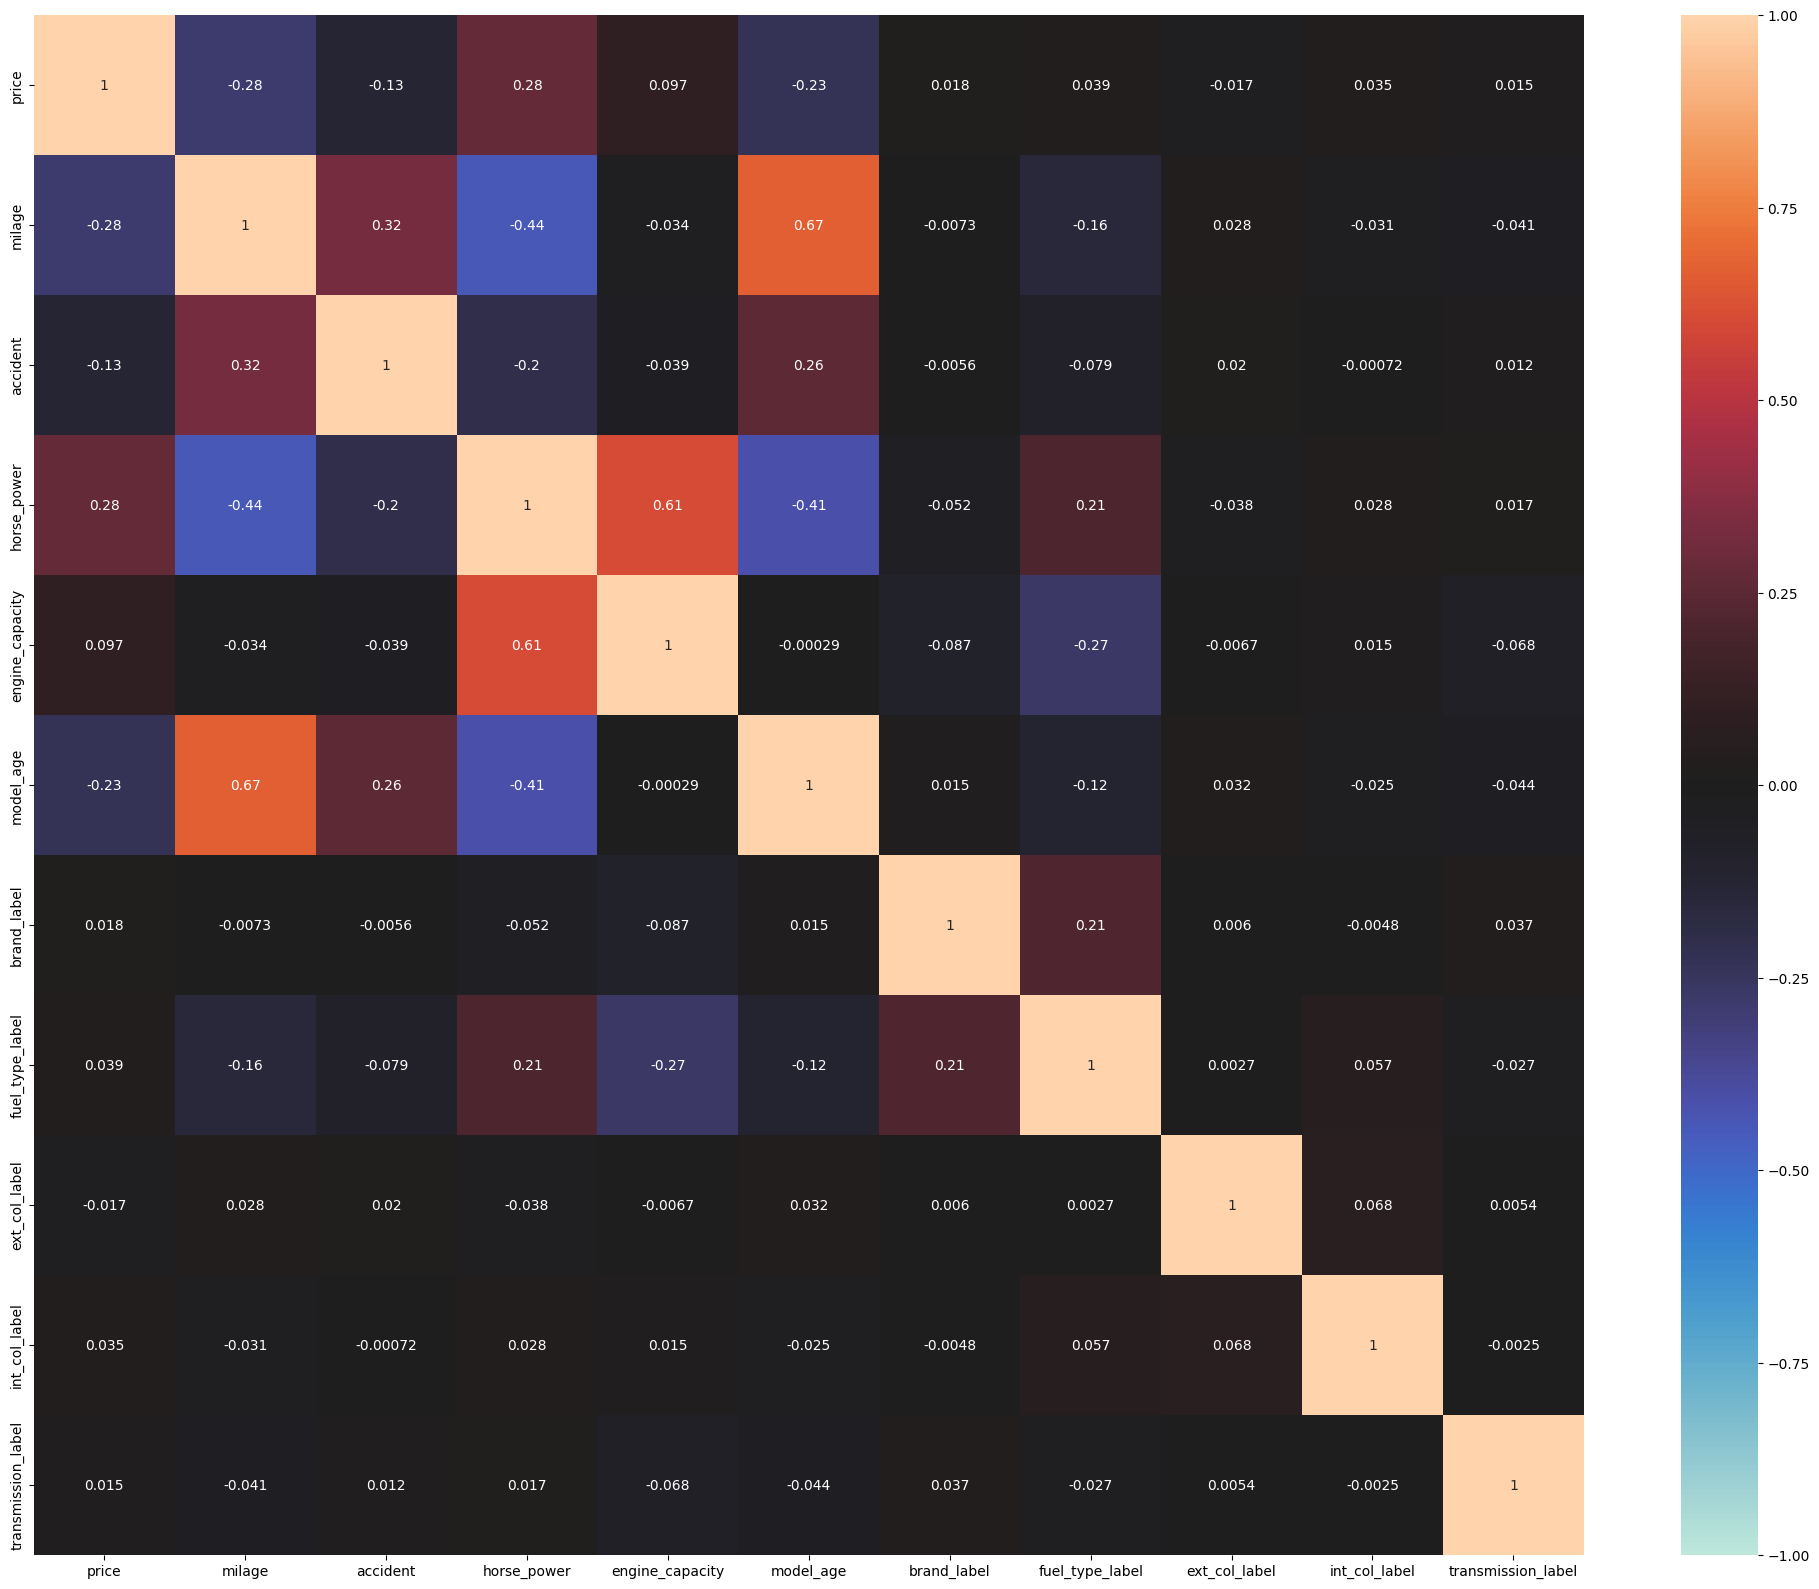

In [18]:
toDrop = [
    "id",
	"clean_title",
	"model",
	"engine",
	"transmission",
	"model_year"
] + toEncode

# Removes duplicates
toDrop = list(dict.fromkeys(toDrop))

# Drops the columns
dTest.drop(toDrop, axis = 1, inplace = True)
dTrain.drop(toDrop, axis = 1, inplace = True)

# Moves the price to the first column
dTrain.insert(0, 'price', dTrain.pop('price'))

correlation = dTrain.corr()
plt.figure(figsize = [25, 20])
sns.heatmap(correlation, annot = True, vmin = -1, vmax = 1, center = 0)
plt.show()

In [19]:
# View data
dTrain

,price,milage,accident,horse_power,engine_capacity,model_age,brand_label,fuel_type_label,ext_col_label,int_col_label,transmission_label
0,4200,213000,False,172.0,1.6,18,31,2,312,71,38
1,4999,143250,True,252.0,3.9,23,28,2,263,10,38
2,13900,136731,False,320.0,5.3,23,9,1,38,71,38
3,45000,19500,False,420.0,5.0,8,16,2,29,14,49
4,97500,7388,False,208.0,2.0,4,36,2,29,10,23
...,...,...,...,...,...,...,...,...,...,...,...
188528,27500,49000,False,420.0,6.2,8,8,2,304,10,49
188529,30000,28600,True,385.0,3.0,7,36,2,304,14,31
188530,86900,13650,False,469.0,4.0,4,36,2,304,14,23
188531,84900,13895,False,None,3.0,3,3,2,82,14,1


# Test Train

## Check for missing

In [20]:
dTrain.isnull().sum()

price                     0
milage                    0
accident                  0
horse_power           33259
engine_capacity       14214
model_age                 0
brand_label               0
fuel_type_label           0
ext_col_label             0
int_col_label             0
transmission_label        0
dtype: int64

## Imputation

In [21]:
dTrainMean = dTrain.copy()
dTrainMedian = dTrain.copy()

In [22]:
toImpute = [
	"horse_power",
	"engine_capacity"
]

for col in toImpute:
	imputer_mean = SimpleImputer(strategy = 'mean')
	dTrainMean[col] = imputer_mean.fit_transform(dTrainMean[[col]])
	
	imputer_median = SimpleImputer(strategy = 'median')
	dTrainMedian[col] = imputer_median.fit_transform(dTrainMedian[[col]])

## Create model (Training)

In [23]:
from sklearn.linear_model import LinearRegression

defaultDrop = [
	"price"
]

toDropTest = [
	
] + defaultDrop

randomState = 42

### Mean

In [24]:
# Put your answer here
x_mean = dTrainMean.drop(toDropTest, axis = 1)
x_mean = sm.add_constant(x_mean)
y_mean = dTrainMean['price']

x_train_mean, x_test_mean, y_train_mean, y_test_mean = train_test_split(
    x_mean,
    y_mean,
    test_size = 0.2,
    random_state = randomState
) 

In [25]:
mean_model = LinearRegression()
mean_model.fit(x_train_mean, y_train_mean)

y_pred_mean = mean_model.predict(x_test_mean)
mean_mse = mean_squared_error(y_test_mean, y_pred_mean, squared = False)

### Median

In [26]:
# Put your answer here
def prepareTrainingData(colsToDrop, df):
	x_median = df.drop(colsToDrop, axis = 1)
	# x_median = sm.add_constant(x_median)
	y_median = df['price']

	return train_test_split(
		x_median,
		y_median,
		test_size = 0.2,
		random_state = randomState
	)

x_train_median, x_test_median, y_train_median, y_test_median = prepareTrainingData(toDropTest, dTrainMedian)

In [27]:
def train(xTrain, yTrain):
	print(xTrain)
	print(f"\n{yTrain}")
	median_model = LinearRegression()
	median_model.fit(xTrain, yTrain)
	return median_model

model = train(x_train_median, y_train_median)
y_pred_median = model.predict(x_test_median)
median_mse = mean_squared_error(y_test_median, y_pred_median, squared = False)

        milage  accident  horse_power  engine_capacity  model_age  \
184031   61675      True        208.0              2.0          8   
173831  185000      True        239.0              4.0         22   
183819   92000      True        325.0              2.7          5   
85525     5483     False        276.0              2.0          2   
41872     5000     False        717.0              6.2          2   
...        ...       ...          ...              ...        ...   
119879   89106      True        350.0              5.7         18   
103694   57300     False        320.0              3.0          6   
131932   31500     False        420.0              3.0          4   
146867  186000     False        268.0              3.5         14   
121958    5989     False        329.0              3.0          2   

        brand_label  fuel_type_label  ext_col_label  int_col_label  \
184031           36                1            128             14   
173831           39            

In [28]:
x_test_median

,milage,accident,horse_power,engine_capacity,model_age,brand_label,fuel_type_label,ext_col_label,int_col_label,transmission_label
111355,23677,False,329.0,3.5,3,39,2,282,69,40
182258,50000,False,280.0,3.9,21,14,2,122,10,38
14147,109646,False,329.0,3.6,6,7,2,78,44,36
79313,102000,False,320.0,3.0,9,4,2,304,14,31
101160,75151,False,295.0,3.5,5,53,2,128,14,31
...,...,...,...,...,...,...,...,...,...,...
71604,71536,False,329.0,3.5,4,14,2,128,39,3
137137,2121,False,296.0,2.0,2,26,3,304,14,31
70567,72639,False,280.0,3.5,12,0,2,234,71,16
94567,115000,False,179.0,2.5,12,49,2,304,10,38


## Evaluation Output (Training)

In [29]:
print(f"Median MSE: {median_mse}")
print(f"Mean MSE: {mean_mse}")

Median MSE: 70460.93710559995
Mean MSE: 70447.33900807284


In [30]:
print(x_train_median.columns)
print(x_train_mean.columns)

Index(['milage', 'accident', 'horse_power', 'engine_capacity', 'model_age',
       'brand_label', 'fuel_type_label', 'ext_col_label', 'int_col_label',
       'transmission_label'],
      dtype='object')
Index(['const', 'milage', 'accident', 'horse_power', 'engine_capacity',
       'model_age', 'brand_label', 'fuel_type_label', 'ext_col_label',
       'int_col_label', 'transmission_label'],
      dtype='object')


# Predicting

## Fix colums

Fix columns to drop

In [31]:
dTest

,milage,accident,horse_power,engine_capacity,model_age,brand_label,fuel_type_label,ext_col_label,int_col_label,transmission_label
0,98000,False,240.0,2.0,10,26,2,302,10,16
1,9142,False,395.0,3.0,5,26,3,261,14,31
2,28121,False,None,3.5,3,14,2,302,57,3
3,61258,False,None,None,9,3,2,259,14,39
4,59000,False,252.0,2.0,7,3,2,127,14,38
...,...,...,...,...,...,...,...,...,...,...
125685,83315,False,362.0,3.0,11,36,2,29,14,23
125686,29336,False,None,None,6,3,2,302,14,39
125687,77634,False,333.0,3.0,13,3,2,29,14,38
125688,112000,False,333.0,3.0,13,3,2,29,14,38


In [32]:
dTest.isnull().sum()

milage                    0
accident                  0
horse_power           22181
engine_capacity        9407
model_age                 0
brand_label               0
fuel_type_label           0
ext_col_label             0
int_col_label             0
transmission_label        0
dtype: int64

## Impute columns

In [33]:
for col in toImpute:
    imputer = SimpleImputer(strategy = 'mean')
    dTest[col] = imputer.fit_transform(dTest[[col]])
    dTrain[col] = imputer.fit_transform(dTrain[[col]])
    

In [34]:
dTest

,milage,accident,horse_power,engine_capacity,model_age,brand_label,fuel_type_label,ext_col_label,int_col_label,transmission_label
0,98000,False,240.000000,2.000000,10,26,2,302,10,16
1,9142,False,395.000000,3.000000,5,26,3,261,14,31
2,28121,False,342.797283,3.500000,3,14,2,302,57,3
3,61258,False,342.797283,3.801503,9,3,2,259,14,39
4,59000,False,252.000000,2.000000,7,3,2,127,14,38
...,...,...,...,...,...,...,...,...,...,...
125685,83315,False,362.000000,3.000000,11,36,2,29,14,23
125686,29336,False,342.797283,3.801503,6,3,2,302,14,39
125687,77634,False,333.000000,3.000000,13,3,2,29,14,38
125688,112000,False,333.000000,3.000000,13,3,2,29,14,38


In [35]:
dTrain

,price,milage,accident,horse_power,engine_capacity,model_age,brand_label,fuel_type_label,ext_col_label,int_col_label,transmission_label
0,4200,213000,False,172.000000,1.6,18,31,2,312,71,38
1,4999,143250,True,252.000000,3.9,23,28,2,263,10,38
2,13900,136731,False,320.000000,5.3,23,9,1,38,71,38
3,45000,19500,False,420.000000,5.0,8,16,2,29,14,49
4,97500,7388,False,208.000000,2.0,4,36,2,29,10,23
...,...,...,...,...,...,...,...,...,...,...,...
188528,27500,49000,False,420.000000,6.2,8,8,2,304,10,49
188529,30000,28600,True,385.000000,3.0,7,36,2,304,14,31
188530,86900,13650,False,469.000000,4.0,4,36,2,304,14,23
188531,84900,13895,False,343.263856,3.0,3,3,2,82,14,1


In [36]:
toDropFinal = [
	"transmission_label",
	"int_col_label",
	"ext_col_label",
	"fuel_type_label",
	"brand_label"
] + defaultDrop

toDropFinal = list(dict.fromkeys(toDropFinal))

In [37]:
dTrain

,price,milage,accident,horse_power,engine_capacity,model_age,brand_label,fuel_type_label,ext_col_label,int_col_label,transmission_label
0,4200,213000,False,172.000000,1.6,18,31,2,312,71,38
1,4999,143250,True,252.000000,3.9,23,28,2,263,10,38
2,13900,136731,False,320.000000,5.3,23,9,1,38,71,38
3,45000,19500,False,420.000000,5.0,8,16,2,29,14,49
4,97500,7388,False,208.000000,2.0,4,36,2,29,10,23
...,...,...,...,...,...,...,...,...,...,...,...
188528,27500,49000,False,420.000000,6.2,8,8,2,304,10,49
188529,30000,28600,True,385.000000,3.0,7,36,2,304,14,31
188530,86900,13650,False,469.000000,4.0,4,36,2,304,14,23
188531,84900,13895,False,343.263856,3.0,3,3,2,82,14,1


In [38]:
toDropFinal

['transmission_label',
 'int_col_label',
 'ext_col_label',
 'fuel_type_label',
 'brand_label',
 'price']

In [39]:
x_train, x_test, y_train, y_test = prepareTrainingData(toDropFinal, dTrain)
print(x_train.columns)
print(dTest.columns)
model = train(x_train, y_train)

dTest.drop(toDropFinal[:-1], axis = 1, inplace = True)

Index(['milage', 'accident', 'horse_power', 'engine_capacity', 'model_age'], dtype='object')
Index(['milage', 'accident', 'horse_power', 'engine_capacity', 'model_age',
       'brand_label', 'fuel_type_label', 'ext_col_label', 'int_col_label',
       'transmission_label'],
      dtype='object')
        milage  accident  horse_power  engine_capacity  model_age
184031   61675      True   208.000000              2.0          8
173831  185000      True   239.000000              4.0         22
183819   92000      True   325.000000              2.7          5
85525     5483     False   276.000000              2.0          2
41872     5000     False   717.000000              6.2          2
...        ...       ...          ...              ...        ...
119879   89106      True   350.000000              5.7         18
103694   57300     False   320.000000              3.0          6
131932   31500     False   420.000000              3.0          4
146867  186000     False   268.000000       

In [40]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred, squared = False)

y_pred = model.predict(dTest)
print(mse)
print(f"\n{x_test.columns}")

70525.70835397726

Index(['milage', 'accident', 'horse_power', 'engine_capacity', 'model_age'], dtype='object')


In [42]:
sf = pd.read_csv('datasets/sample_submission.csv')
id = sf.pop('id')

submission = pd.DataFrame({
	'id': id,
	'price': y_pred
})

submission.to_csv('datasets/submission.csv', index = False)